In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk, ellipord, ellip
import soundfile as sf
from IPython.display import Audio
from IPython.display import display

In [2]:
MIDIFROM = 24
MIDITO = 108

SKIP_SEC = 0.25
HOWMUCH_SEC = 0.5
WHOLETONE_SEC = 2

howmanytones = MIDITO - MIDIFROM + 1    # tone count
tones = np.arange(MIDIFROM, MIDITO+1)   # 24-108

s, Fs = sf.read('klavir.wav')           # read sound file

N = int(Fs * HOWMUCH_SEC)               # sample count for selected part of tone
Nwholetone = int(Fs * WHOLETONE_SEC)    # sample count for whole tone

xall = np.zeros((MIDITO+1, N))          # matrix (109 tones x 24000 samples) with all tones - first signals empty,
                                        # but we have plenty of memory ...
                             
samplefrom = int(SKIP_SEC * Fs)         # first tone to start from
sampleto = samplefrom + N               # first tone to end with

for tone in tones:
    x = s[samplefrom:sampleto]          # select part of tone
    x = x - np.mean(x)                  # safer to center ...
    xall[tone,:] = x                    # save tone to matrix

    samplefrom += Nwholetone            # next tone
    sampleto += Nwholetone              # next tone

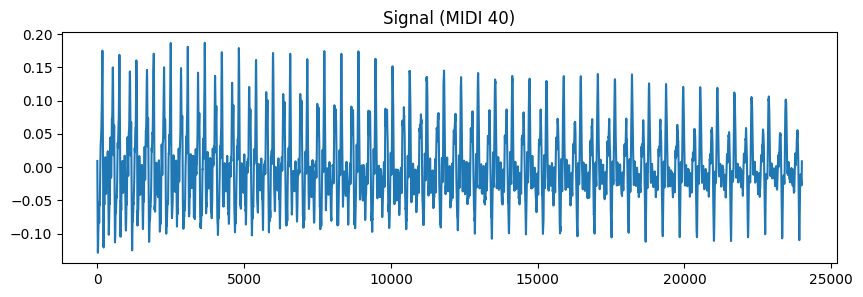

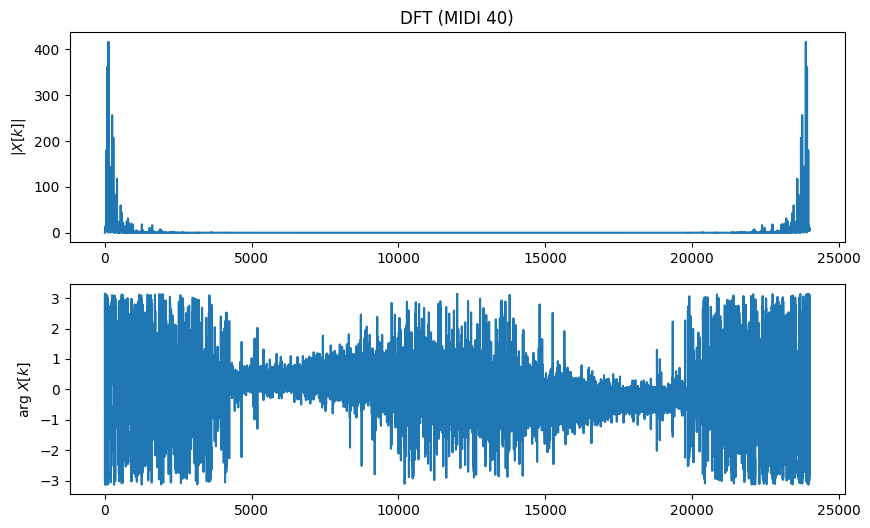

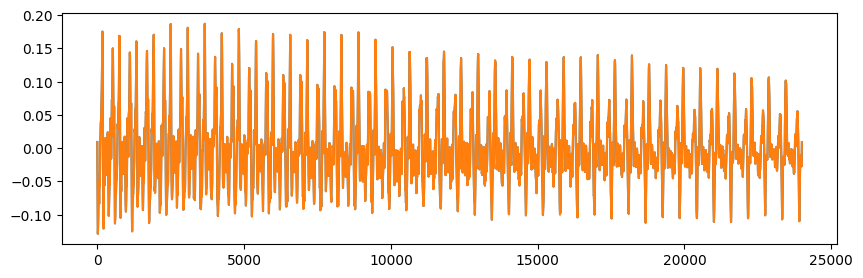

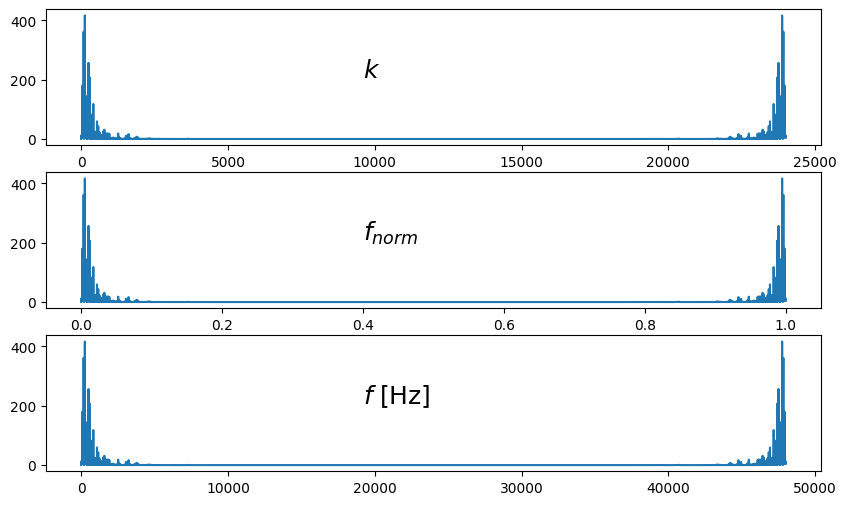

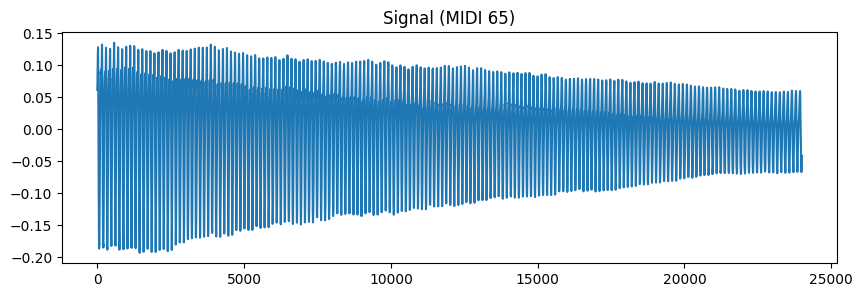

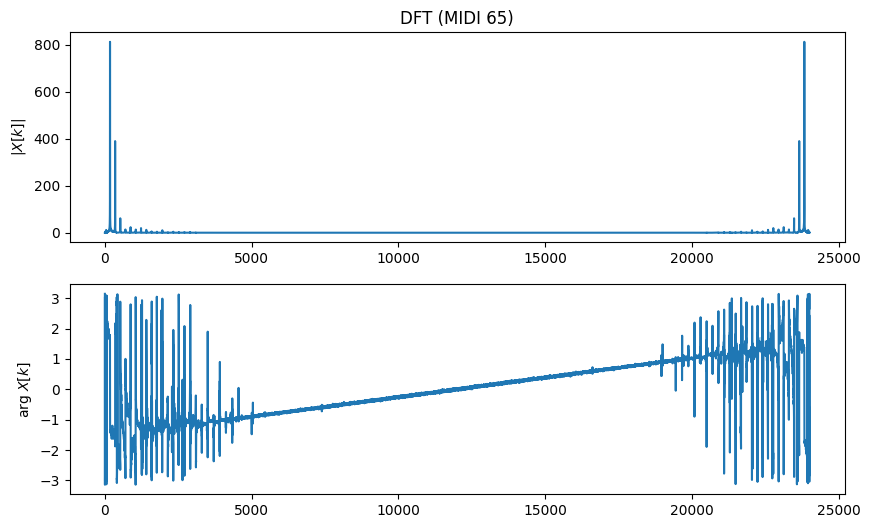

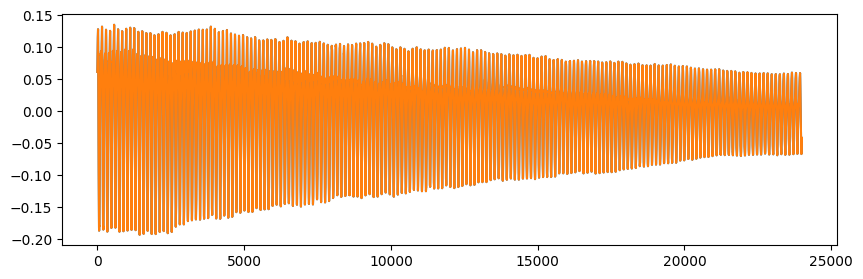

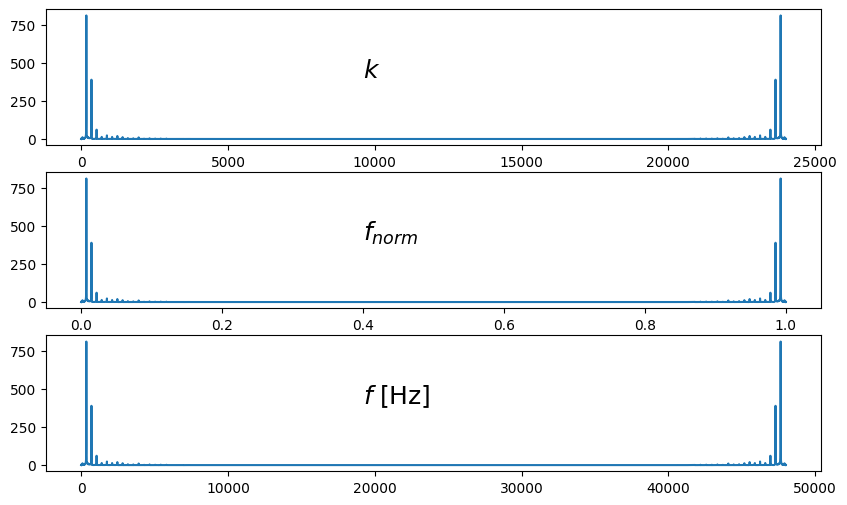

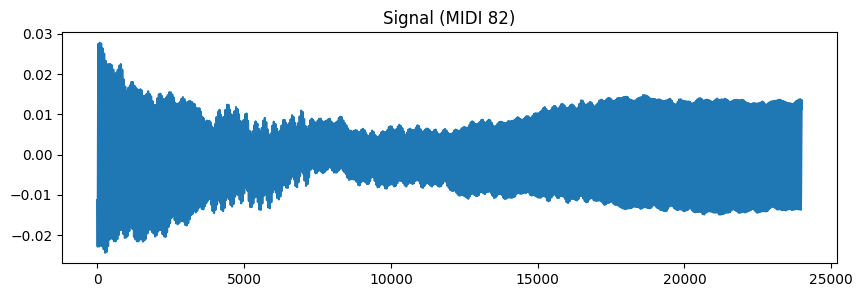

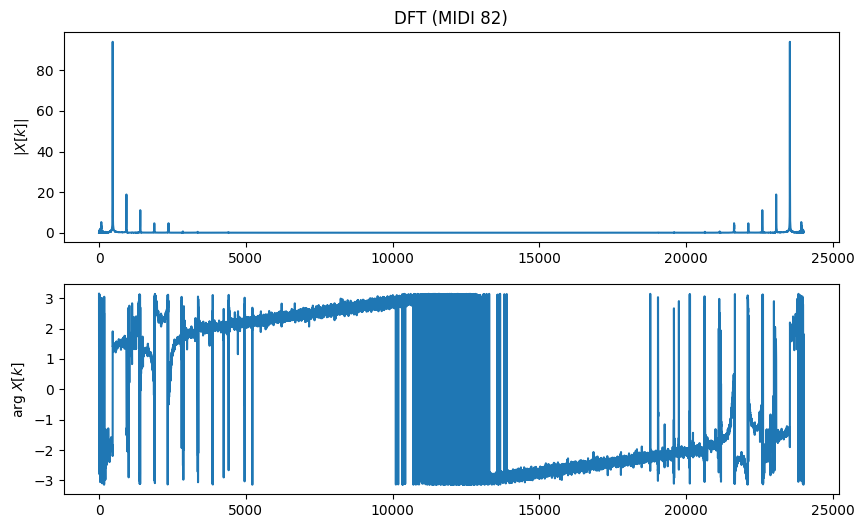

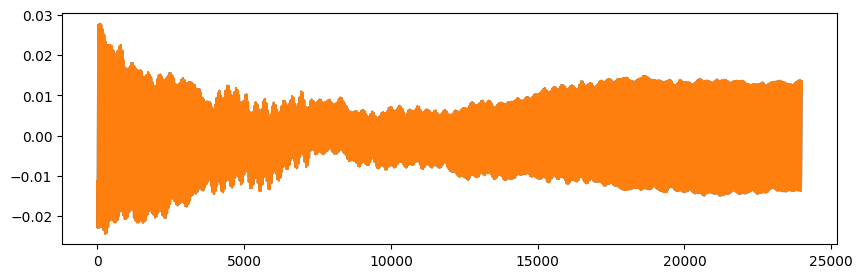

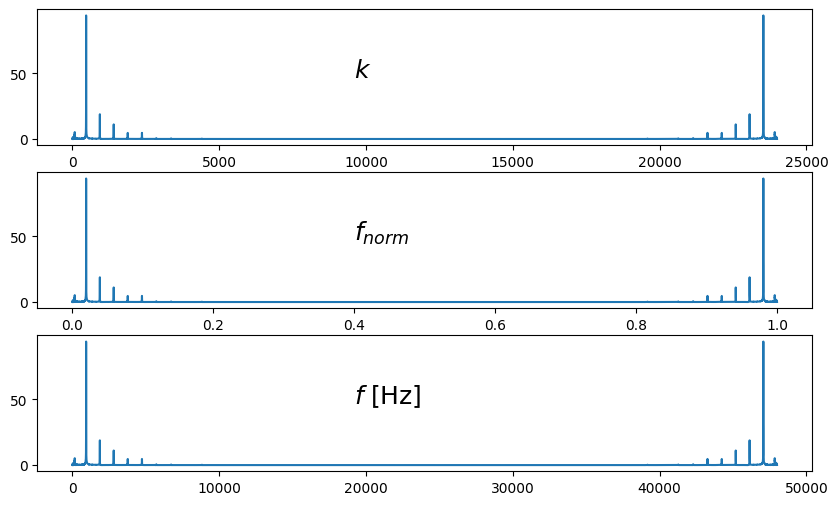

In [3]:
SELECTED_TONES = [40, 65, 82]           # selected tones
TONES_FREQ = [82.41, 349.23, 932.33]    # selected tones frequencies
ch = 'a'                                # starting tone constant

for tone in SELECTED_TONES:
    # save orig tone
    #display(Audio(xall[tone], rate=Fs))
    sf.write('audio/%c_orig.wav' % ch, xall[tone], Fs)

    # plot tone
    plt.figure(figsize=(10, 3))
    plt.title('Signal (MIDI %d)' % tone)
    plt.plot(xall[tone])
    #plt.ylabel('Amplitude')
    #plt.xlabel('$N$')
    plt.show()

    # analysis
    X = np.fft.fft(xall[tone])          # DFT
    kall = np.arange(0, N)              # coefficients (0 ... N)
    Xmag = np.abs(X)                    # magnitude
    Xphase = np.angle(X)                # phase

    # plot analysis
    _, ax = plt.subplots(2,1, figsize=(10,6))
    ax[0].set_title('DFT (MIDI %d)' % tone)
    ax[0].plot(kall, Xmag)
    #ax[0].set_xlabel('$N$')
    ax[0].set_ylabel('$|X[k]|$')
    ax[1].plot(kall, Xphase)
    #ax[1].set_xlabel('$N$')
    ax[1].set_ylabel('arg $X[k]$')
    plt.show()

    # synthesis
    xs = np.fft.ifft(X)
    xs = np.real(xs)                # because of numerical computation ... 

    # plot synthesis
    plt.figure(figsize=(10,3))
    plt.plot(kall, xall[tone])
    plt.plot(kall, xs)
    plt.show()

    # save synth tone
    #display(Audio(xs, rate=Fs))
    sf.write('audio/%c.wav' % ch, xs, Fs)

    _, ax = plt.subplots(3,1, figsize=(10,6))
    ax[0].plot(kall, Xmag)
    ax[0].text(0.4*N, max(Xmag)/2, '$k$',fontsize=18)
    fnorm = kall / N
    ax[1].plot(fnorm, Xmag)
    ax[1].text(0.4, max(Xmag)/2, '$f_{norm}$',fontsize=18)
    f = fnorm * Fs
    ax[2].plot(f, Xmag)
    ax[2].text(0.4*Fs, max(Xmag)/2, '$f$ [Hz]',fontsize=18)

    ch = chr(ord(ch) + 1)               # increment tone constant